# <font color=blue>Assignments for "Making Predictions"</font>

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle
- Split your data into train and test sets.
- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.
- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.
- Is the performance of your model satisfactory? Why?
- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas.api.types as pt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import researchpy as rp
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10}

In [2]:
house_prices_train = pd.read_csv("../../data/regression_assignments/train.csv")
variables=house_prices_train[['SalePrice','OverallQual','YearRemodAdd','MasVnrArea','TotalBsmtSF','FullBath','Fireplaces',
                                'GarageCars','LotShape','LandContour','BldgType', 'SaleCondition']]
variables['MasVnrArea'].fillna(variables['MasVnrArea'].median(),inplace=True)
var_numeric=variables.select_dtypes(include=['float64','int64'])
var_cat=variables.select_dtypes(include=['object'])
var_dummies=pd.get_dummies(var_cat,drop_first=True)

var_regress=pd.concat([var_numeric,var_dummies],axis=1)
var_regress

,SalePrice,OverallQual,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,7,2003,196.00,856,2,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,181500,6,1976,0.00,1262,2,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,223500,7,2002,162.00,920,2,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,140000,7,1970,0.00,756,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,250000,8,2000,350.00,1145,2,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,2000,0.00,953,2,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1456,210000,6,1988,119.00,1542,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1457,266500,7,2006,0.00,1152,2,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1458,142125,5,1996,0.00,1078,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [3]:
Y=var_regress['SalePrice']
X=var_regress.loc[:,var_regress.columns!='SalePrice']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 6)

In [5]:
X_train = sm.add_constant(X_train)

results_train = sm.OLS(Y_train, X_train).fit()

results_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     154.8
Date:                Sat, 19 Sep 2020   Prob (F-statistic):          3.07e-303
Time:                        20:43:11   Log-Likelihood:                -12203.
No. Observations:                1022   AIC:                         2.445e+04
Df Residuals:                     999   BIC:                         2.456e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.897e+05   1.42e+05     -4.854      0.000   -9.68e+05   -4.11e+05
OverallQual             2.43e+04   1417.795     17.139      0.000    2.15e+04    2.71e+04
YearRemodAdd            313.9057     73.614      4.264      0.000     169.450     458.361
MasVnrArea               36.1385      7.452      4.849      0.000      21.514      50.763
TotalBsmtSF              31.0646      3.344      9.291      0.000      24.503      37.626
FullBath               1.588e+04   2763.442      5.745      0.000    1.05e+04    2.13e+04
Fireplaces              1.44e+04   2052.858      7.015      0.000    1.04e+04    1.84e+04
GarageCars             1.323e+04   2154.624      6.139      0.000    8998.073    1.75e+04
LotShape_IR2            1.33e+04   7489.286      1.776      0.076   -1393.704     2.8e+04
LotShape_IR3          -7.433e+04   1.73e+04     -4.305      0.000   -1.08e+05   -4.04e+04
LotShape_Reg          -4407.5791   2663.147     -1.655      0.098   -9633.584     818.425
LandContour_HLS         1.58e+04   8698.388      1.816      0.070   -1272.476    3.29e+04
LandContour_Low        2.357e+04   9567.231      2.464      0.014    4796.581    4.23e+04
LandContour_Lvl        7106.7158   5901.164      1.204      0.229   -4473.382    1.87e+04
BldgType_2fmCon        2003.5659   8636.214      0.232      0.817   -1.49e+04     1.9e+04
BldgType_Duplex       -6594.7960   7150.562     -0.922      0.357   -2.06e+04    7437.049
BldgType_Twnhs        -2.705e+04   7152.040     -3.782      0.000   -4.11e+04    -1.3e+04
BldgType_TwnhsE       -2.594e+04   4450.702     -5.828      0.000   -3.47e+04   -1.72e+04
SaleCondition_AdjLand  2.983e+04   2.72e+04      1.097      0.273   -2.35e+04    8.32e+04
SaleCondition_Alloca    2.34e+04    1.4e+04      1.675      0.094   -4017.291    5.08e+04
SaleCondition_Family  -1.568e+04    1.1e+04     -1.421      0.156   -3.73e+04    5979.196
SaleCondition_Normal   2343.8252   4734.856      0.495      0.621   -6947.579    1.16e+04
SaleCondition_Partial  2.499e+04   6559.699      3.809      0.000    1.21e+04    3.79e+04
==============================================================================
Omnibus:                      418.539   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10821.872
Skew:                           1.295   Prob(JB):                         0.00
Kurtosis:                      18.730   Cond. No.                     2.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
print("The results of goodness of fit test of the model is:", results_train.f_pvalue)
print("The R-squared and the adjusted R-squared of the model are {:.4f} and {:.4f}, respectively.".format(results_train.rsquared,results_train.rsquared_adj))
print("The AIC and  BIC value of the model are {:.4f} and {:.4f}, respectively.".format(results_train.aic,results_train.bic))

The results of goodness of fit test of the model is: 3.065008278664287e-303
The R-squared and the adjusted R-squared of the model are 0.7732 and 0.7682, respectively.
The AIC and  BIC value of the model are 24451.1437 and 24564.5226, respectively.


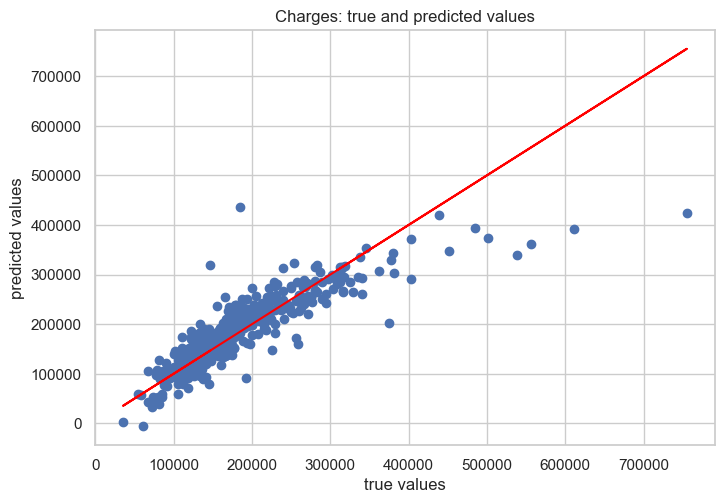

Mean absolute error of the prediction is: 26036.86938899173
Mean squared error of the prediction is: 1738360795.4030454
Root mean squared error of the prediction is: 41693.65413828639
Mean absolute percentage error of the prediction is: 15.054342700057441


In [7]:
X_test = sm.add_constant(X_test)

Y_preds = results_train.predict(X_test)

plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100))


## Exclude some features

In [8]:
X_train.drop(columns=['LandContour_HLS', 'LandContour_Low', 'BldgType_Twnhs',
       'BldgType_TwnhsE','SaleCondition_AdjLand', 'SaleCondition_Alloca'],inplace=True)
X_test.drop(columns=['LandContour_HLS', 'LandContour_Low', 'BldgType_Twnhs',
       'BldgType_TwnhsE','SaleCondition_AdjLand', 'SaleCondition_Alloca'],inplace=True)

In [9]:
results_train2 = sm.OLS(Y_train, X_train).fit()

results_train2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sat, 19 Sep 2020   Prob (F-statistic):          1.92e-298
Time:                        20:43:11   Log-Likelihood:                -12230.
No. Observations:                1022   AIC:                         2.449e+04
Df Residuals:                    1005   BIC:                         2.458e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.819e+05   1.44e+05     -4.049      0.000   -8.64e+05      -3e+05
OverallQual            2.345e+04   1437.685     16.310      0.000    2.06e+04    2.63e+04
YearRemodAdd            266.9648     74.391      3.589      0.000     120.986     412.943
MasVnrArea               32.6470      7.596      4.298      0.000      17.741      47.553
TotalBsmtSF              32.5465      3.389      9.603      0.000      25.895      39.198
FullBath               1.535e+04   2821.456      5.441      0.000    9816.189    2.09e+04
Fireplaces             1.531e+04   2095.406      7.304      0.000    1.12e+04    1.94e+04
GarageCars             1.467e+04   2175.007      6.743      0.000    1.04e+04    1.89e+04
LotShape_IR2           1.453e+04   7626.271      1.906      0.057    -432.501    2.95e+04
LotShape_IR3          -7.205e+04   1.77e+04     -4.078      0.000   -1.07e+05   -3.74e+04
LotShape_Reg          -6184.5910   2700.939     -2.290      0.022   -1.15e+04    -884.466
LandContour_Lvl       -5259.5584   4085.061     -1.288      0.198   -1.33e+04    2756.668
BldgType_2fmCon        4384.0466   8835.664      0.496      0.620    -1.3e+04    2.17e+04
BldgType_Duplex        -461.8172   7039.456     -0.066      0.948   -1.43e+04    1.34e+04
SaleCondition_Family  -1.923e+04   1.11e+04     -1.726      0.085   -4.11e+04    2631.381
SaleCondition_Normal   -299.7458   4561.919     -0.066      0.948   -9251.724    8652.232
SaleCondition_Partial  2.312e+04   6486.900      3.564      0.000    1.04e+04    3.58e+04
==============================================================================
Omnibus:                      390.968   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9943.514
Skew:                           1.173   Prob(JB):                         0.00
Kurtosis:                      18.100   Cond. No.                     2.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
print("The results of goodness of fit test of the model is:", results_train2.f_pvalue)
print("The R-squared and the adjusted R-squared of the model are {:.4f} and {:.4f}, respectively.".format(results_train2.rsquared,results_train2.rsquared_adj))
print("The AIC and  BIC value of the model are {:.4f} and {:.4f}, respectively.".format(results_train2.aic,results_train2.bic))

The results of goodness of fit test of the model is: 1.917506492741406e-298
The R-squared and the adjusted R-squared of the model are 0.7607 and 0.7569, respectively.
The AIC and  BIC value of the model are 24493.8792 and 24577.6810, respectively.


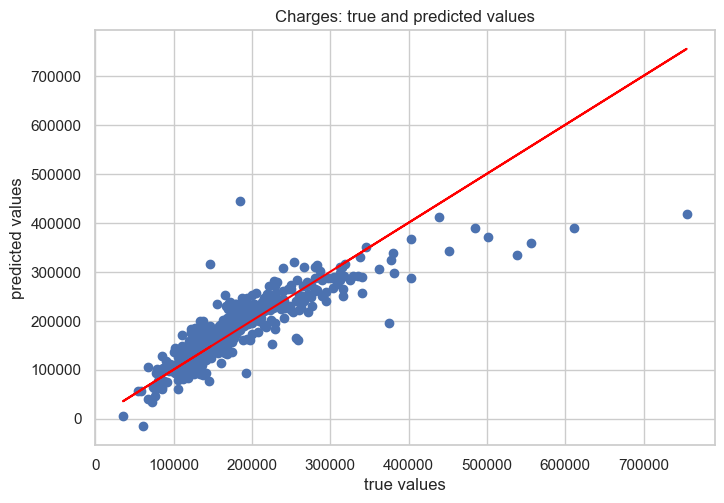

Mean absolute error of the prediction is: 27400.25583993384
Mean squared error of the prediction is: 1835277596.3269122
Root mean squared error of the prediction is: 42840.140012923766
Mean absolute percentage error of the prediction is: 15.664331491406577


In [11]:
Y_preds2 = results_train2.predict(X_test)

plt.scatter(Y_test, Y_preds2)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_preds2)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_preds2)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_preds2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_preds2) / Y_test)) * 100))


In [12]:
A={"R_squared":[results_train.rsquared,results_train2.rsquared],
   "Adj. R-squared":[results_train.rsquared_adj,results_train2.rsquared_adj],
    "AIC":[results_train.aic,results_train2.aic],
    "BIC":[results_train.bic,results_train2.bic],
    "MAE":[mean_absolute_error(Y_test, Y_preds),mean_absolute_error(Y_test, Y_preds2)],
    "MSE":[mse(Y_test, Y_preds),mse(Y_test, Y_preds2)],
    "RMSE":[rmse(Y_test, Y_preds),rmse(Y_test, Y_preds2)],
    "MAPE":[np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100, np.mean(np.abs((Y_test - Y_preds2) / Y_test)) * 100]}
pd.DataFrame(A,index=["Model 1","Model 2"])

,R_squared,Adj. R-squared,AIC,BIC,MAE,MSE,RMSE,MAPE
Model 1,0.77,0.77,24451.14,24564.52,26036.87,1738360795.40,41693.65,15.05
Model 2,0.76,0.76,24493.88,24577.68,27400.26,1835277596.33,42840.14,15.66


**INTERPRETATION:** 

According to the results above, the best model is "Model 1".